In [185]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['wisconsin_breast_cancer.csv']


Author:Michael Zhou

ID:1337316

Pair Programming Buddy:

Name:Lan Niu

ID:1320386


In [186]:
breastData = pd.read_csv('../input/wisconsin_breast_cancer.csv')
breastData.head()

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [187]:
median_nuclei = breastData['nuclei'].median()
breastData['nuclei'].fillna(median_nuclei, inplace=True)

In [188]:
from sklearn.model_selection import train_test_split
x = breastData.iloc[:,1:10]
y = breastData.iloc[:,10]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1337316)
print(len(X_train), len(X_test))



559 140


In [ ]:
allresult=[]
allname=[]
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd=SGDClassifier(random_state=1337316,max_iter=1000,tol=1e-3)

for i in range(1,512):
    tmp=int("{0:b}".format(i))
    result=[]
   
    for x in range(9):
        if tmp%10==1:
            if(x==0):
               
                result.append('thickness')
            elif (x==1):
            
                result.append('size')
            elif (x==2):
             
                result.append('shape')
            elif (x==3):
                
                result.append('adhesion')
            elif (x==4):
               
                result.append('single')
            elif (x==5):
                
                result.append('nuclei')
            elif (x==6):
               
                result.append('chromatin')
            elif (x==7):
              
                result.append('nucleoli')
            elif(x==8):
               
                result.append('mitosis')
        tmp=tmp//10
    
    if len(result)==1:
        continue
    elif len(result)==2:
        X_trainNew1=X_train.loc[:,[result[0],result[1]]]   
    elif len(result)==3:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2]]]
    elif len(result)==4:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3]]]
    elif len(result)==5:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4]]]
    elif len(result)==6:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5]]]
    elif len(result)==7:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6]]]
    elif len(result)==8:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]]]
    elif len(result)==9:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8]]]
        
    display_score=cross_val_score(sgd,X_trainNew1,y_train,cv=10,scoring="accuracy")
    display_score.mean()
    
    print(*result)
    print(display_score.mean())
    allname.append(result)
    allresult.append(display_score.mean())
    
    
    

    
    

thickness size
0.935574162679426
thickness shape
0.9393671679197994
size shape
0.9174897470950102
thickness size shape
0.9516478696741855
thickness adhesion
0.928524151287309
size adhesion
0.9338533834586465
thickness size adhesion
0.9498934837092733
shape adhesion
0.9285879471405787
thickness shape adhesion
0.9587930052403738
size shape adhesion
0.9445989974937344
thickness size shape adhesion
0.9497983595352016
thickness single
0.9177101845522898
size single
0.9211887673729778
thickness size single
0.9517441330599226
shape single
0.9248866484392799
thickness shape single
0.9516791979949873
size shape single
0.9517743221690591
thickness size shape single
0.9551566416040101
adhesion single
0.8927392344497607
thickness adhesion single
0.9231009341535656
size adhesion single
0.9282701070858966
thickness size adhesion single
0.9443762816131237
shape adhesion single
0.9444064707222601
thickness shape adhesion single
0.9533709273182958
size shape adhesion single
0.9480764411027568
thickness

adhesion single nuclei nucleoli
0.9301532239690135
thickness adhesion single nuclei nucleoli
0.9641826156299841
size adhesion single nuclei nucleoli
0.9535623148781044
thickness size adhesion single nuclei nucleoli
0.9678178400546822
shape adhesion single nuclei nucleoli
0.946385850991114
thickness shape adhesion single nuclei nucleoli
0.9551891091364775
size shape adhesion single nuclei nucleoli
0.9553804966962861
thickness size shape adhesion single nuclei nucleoli
0.9498946229209386
chromatin nucleoli
0.8975814536340853
thickness chromatin nucleoli
0.9393022328548645
size chromatin nucleoli
0.9286215538847117
thickness size chromatin nucleoli
0.9445015948963317
shape chromatin nucleoli
0.9340738209159263
thickness shape chromatin nucleoli
0.9446001367053999
size shape chromatin nucleoli
0.9357028935976304
thickness size shape chromatin nucleoli
0.948204032809296
adhesion chromatin nucleoli
0.9266085668717248
thickness adhesion chromatin nucleoli
0.9479801777170197
size adhesion chro

Find the best subset given cross-validation scores 

In [165]:
print("Best subset for train data")
print(*allname[allresult.index(max(allresult))])
print(max(allresult))


Best subset for train data
thickness shape single nuclei chromatin
0.9733048530416951


In [166]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
allresult1=[]
allname1=[]
sgd.fit(X_train, y_train)

for i in range(1,512):
    tmp=int("{0:b}".format(i))
    result=[]
   
    for x in range(9):
        if tmp%10==1:
            if(x==0):
               
                result.append('thickness')
            elif (x==1):
            
                result.append('size')
            elif (x==2):
             
                result.append('shape')
            elif (x==3):
                
                result.append('adhesion')
            elif (x==4):
               
                result.append('single')
            elif (x==5):
                
                result.append('nuclei')
            elif (x==6):
               
                result.append('chromatin')
            elif (x==7):
              
                result.append('nucleoli')
            elif(x==8):
               
                result.append('mitosis')
        tmp=tmp//10
    
    if len(result)==1:
        continue 
    elif len(result)==2:
        X_testNew=X_test.loc[:,[result[0],result[1]]]   
    elif len(result)==3:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2]]]
    elif len(result)==4:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3]]]
    elif len(result)==5:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4]]]
    elif len(result)==6:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5]]]
    elif len(result)==7:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6]]]
    elif len(result)==8:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]]]
    elif len(result)==9:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8]]]
    
    display_score=cross_val_score(sgd,X_testNew,y_test,cv=10,scoring="accuracy")
    display_score.mean()
    
    print(*result)
    print(display_score.mean())
    allname1.append(result)
    allresult1.append(display_score.mean())
    
    

thickness size
0.9213553113553115
thickness shape
0.93
size shape
0.9361172161172162
thickness size shape
0.9075457875457875
thickness adhesion
0.8938095238095238
size adhesion
0.907069597069597
thickness size adhesion
0.9151648351648352
shape adhesion
0.9146153846153846
thickness shape adhesion
0.9366666666666668
size shape adhesion
0.8998534798534799
thickness size shape adhesion
0.950952380952381
thickness single
0.8783516483516485
size single
0.908021978021978
thickness size single
0.8783516483516485
shape single
0.9059706959706961
thickness shape single
0.9289743589743589
size shape single
0.9217582417582417
thickness size shape single
0.9366666666666668
adhesion single
0.8784249084249085
thickness adhesion single
0.8952380952380953
size adhesion single
0.9141391941391941
thickness size adhesion single
0.8876190476190476
shape adhesion single
0.9361172161172162
thickness shape adhesion single
0.908974358974359
size shape adhesion single
0.9284249084249085
thickness size shape adhe

adhesion single nuclei nucleoli
0.9652380952380952
thickness adhesion single nuclei nucleoli
0.908974358974359
size adhesion single nuclei nucleoli
0.9218315018315018
thickness size adhesion single nuclei nucleoli
0.9293772893772895
shape adhesion single nuclei nucleoli
0.9207326007326009
thickness shape adhesion single nuclei nucleoli
0.9218315018315018
size shape adhesion single nuclei nucleoli
0.928901098901099
thickness size shape adhesion single nuclei nucleoli
0.8648717948717948
chromatin nucleoli
0.8558241758241758
thickness chromatin nucleoli
0.909047619047619
size chromatin nucleoli
0.9003296703296705
thickness size chromatin nucleoli
0.9366666666666668
shape chromatin nucleoli
0.92992673992674
thickness shape chromatin nucleoli
0.93
size shape chromatin nucleoli
0.9141391941391943
thickness size shape chromatin nucleoli
0.928901098901099
adhesion chromatin nucleoli
0.9152380952380952
thickness adhesion chromatin nucleoli
0.9366666666666668
size adhesion chromatin nucleoli
0.8

thickness size single chromatin mitosis
0.9571428571428571
shape single chromatin mitosis
0.9208058608058609
thickness shape single chromatin mitosis
0.9504761904761905
size shape single chromatin mitosis
0.9059706959706959
thickness size shape single chromatin mitosis
0.950952380952381
adhesion single chromatin mitosis
0.8861172161172162
thickness adhesion single chromatin mitosis
0.9214285714285714
size adhesion single chromatin mitosis
0.9008791208791209
thickness size adhesion single chromatin mitosis
0.909047619047619
shape adhesion single chromatin mitosis
0.863992673992674
thickness shape adhesion single chromatin mitosis
0.950952380952381
size shape adhesion single chromatin mitosis
0.8707326007326006
thickness size shape adhesion single chromatin mitosis
0.9223076923076924
nuclei chromatin mitosis
0.9356410256410257
thickness nuclei chromatin mitosis
0.9406593406593406
size nuclei chromatin mitosis
0.9192307692307692
thickness size nuclei chromatin mitosis
0.8956043956043954
s

thickness nuclei chromatin nucleoli mitosis
0.957069597069597
size nuclei chromatin nucleoli mitosis
0.9295238095238096
thickness size nuclei chromatin nucleoli mitosis
0.930952380952381
shape nuclei chromatin nucleoli mitosis
0.8828205128205129
thickness shape nuclei chromatin nucleoli mitosis
0.9576190476190476
size shape nuclei chromatin nucleoli mitosis
0.9047985347985348
thickness size shape nuclei chromatin nucleoli mitosis
0.8977289377289377
adhesion nuclei chromatin nucleoli mitosis
0.9223076923076924
thickness adhesion nuclei chromatin nucleoli mitosis
0.9356410256410257
size adhesion nuclei chromatin nucleoli mitosis
0.9366666666666668
thickness size adhesion nuclei chromatin nucleoli mitosis
0.9212820512820514
shape adhesion nuclei chromatin nucleoli mitosis
0.9438095238095239
thickness shape adhesion nuclei chromatin nucleoli mitosis
0.9433333333333334
size shape adhesion nuclei chromatin nucleoli mitosis
0.9366666666666668
thickness size shape adhesion nuclei chromatin nuc

Find the accuracy of same five subset, then find the best accuracy. They are different, so the test result is not the best data accuracy.

In [ ]:
print("Accaurcy for the best subset in train data for sgd classifier")
print(allresult1[allname1.index(allname[allresult.index(max(allresult))])])

print("The best subset for test data for sgd classifier")
print(*allname1[allresult1.index(max(allresult1))])
print(max(allresult1))

In [ ]:
import seaborn as sns
cv_tupels = [[f,'cv',x] for f,x in zip(range(511),allresult)]
test_tupels = [[f,'test',x] for f,x in zip(range(511),allresult1)]
results = pd.DataFrame(cv_tupels+test_tupels,columns=['fold','algo','rmse'])
sns.scatterplot(data=results,x='fold',y='rmse',hue='algo')



Answer:
1.Which subset looks best given the cross-validation scores?

    A:  The subset of 'thickness shape single nuclei chromatin' is the best in train data with a score of 0.9733048530416951

2. What is the accuracy of this subset on the test data?
    A:  The accuracy of this subset on test data is 0.9499
    
3. Is that the best possible test data accuracy?
    A:  No, the best data accuracy for test data is not the best one in train data, is another setsub of 'thickness size adhesion nuclei nucleoli' which has the accuracy of 0.9723

Part2

--------------- random forest classifier's subset for train data ---------------

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
forest_data=RandomForestClassifier(random_state=1337316,n_estimators=30)
allresult2=[]
allname2=[]
for i in range(1,512):
    tmp=int("{0:b}".format(i))
    result=[]
   
    for x in range(9):
        if tmp%10==1:
            if(x==0):
               
                result.append('thickness')
            elif (x==1):
            
                result.append('size')
            elif (x==2):
             
                result.append('shape')
            elif (x==3):
                
                result.append('adhesion')
            elif (x==4):
               
                result.append('single')
            elif (x==5):
                
                result.append('nuclei')
            elif (x==6):
               
                result.append('chromatin')
            elif (x==7):
              
                result.append('nucleoli')
            elif(x==8):
               
                result.append('mitosis')
        tmp=tmp//10
    
    if len(result)==1:
        continue
    elif len(result)==2:
        X_trainNew1=X_train.loc[:,[result[0],result[1]]]   
    elif len(result)==3:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2]]]
    elif len(result)==4:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3]]]
    elif len(result)==5:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4]]]
    elif len(result)==6:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5]]]
    elif len(result)==7:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6]]]
    elif len(result)==8:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]]]
    elif len(result)==9:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8]]]
        
    display_score=cross_val_score(forest_data,X_trainNew1,y_train,cv=10,scoring="accuracy")
    display_score.mean()
    
    print(*result)
    print(display_score.mean())
    allname2.append(result)
    allresult2.append(display_score.mean())

In [ ]:
print("Best accuracy for random forest's train subset")
print(*allname2[allresult2.index(max(allresult2))])
print(max(allresult2))

-------------------------- random forest's test subset -------------------------

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
allresult3=[]
allname3=[]
forest_data.fit(X_train, y_train)

for i in range(1,512):
    tmp=int("{0:b}".format(i))
    result=[]
   
    for x in range(9):
        if tmp%10==1:
            if(x==0):
               
                result.append('thickness')
            elif (x==1):
            
                result.append('size')
            elif (x==2):
             
                result.append('shape')
            elif (x==3):
                
                result.append('adhesion')
            elif (x==4):
               
                result.append('single')
            elif (x==5):
                
                result.append('nuclei')
            elif (x==6):
               
                result.append('chromatin')
            elif (x==7):
              
                result.append('nucleoli')
            elif(x==8):
               
                result.append('mitosis')
        tmp=tmp//10
    
    if len(result)==1:
        continue 
    elif len(result)==2:
        X_testNew=X_test.loc[:,[result[0],result[1]]]   
    elif len(result)==3:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2]]]
    elif len(result)==4:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3]]]
    elif len(result)==5:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4]]]
    elif len(result)==6:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5]]]
    elif len(result)==7:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6]]]
    elif len(result)==8:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]]]
    elif len(result)==9:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8]]]
    
    display_score=cross_val_score(forest_data,X_testNew,y_test,cv=10,scoring="accuracy")
    display_score.mean()
    
    print(*result)
    print(display_score.mean())
    allname3.append(result)
    allresult3.append(display_score.mean())

In [ ]:
print("The best subset for random forest's train data in test data")
print(allresult3[allname3.index(allname2[allresult2.index(max(allresult2))])])
print("---------")
print("The best subset for random forest's test data")
print(*allname3[allresult3.index(max(allresult3))])
print(max(allresult3))

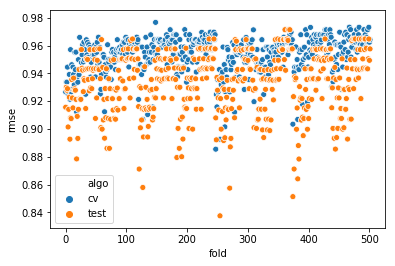

In [182]:
import seaborn as sns
cv_tupels = [[f,'cv',x] for f,x in zip(range(511),allresult2)]
test_tupels = [[f,'test',x] for f,x in zip(range(511),allresult3)]
results = pd.DataFrame(cv_tupels+test_tupels,columns=['fold','algo','rmse'])
sns.scatterplot(data=results,x='fold',y='rmse',hue='algo')

Answer:
1.Which subset looks best given the cross-validation scores?

    A:  The subset of 'thickness shape adhesion single nucleoli' is the best in train data with a score of 0.9767173615857825

2. What is the accuracy of this subset on the test data?
    A:  The accuracy of this subset on test data is 0.97142857
    
3. Is that the best possible test data accuracy?
    A:  No, the best data accuracy for test data is not the best one in train data, is another setsub of 'thickness size single nuclei chromatin mitosis' which has the accuracy of 0.9714

---------------------- GaussianNB's train data ---------------------------------

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
GNB_data=GaussianNB()
allresult4=[]
allname4=[]
for i in range(1,512):
    tmp=int("{0:b}".format(i))
    result=[]
   
    for x in range(9):
        if tmp%10==1:
            if(x==0):
               
                result.append('thickness')
            elif (x==1):
            
                result.append('size')
            elif (x==2):
             
                result.append('shape')
            elif (x==3):
                
                result.append('adhesion')
            elif (x==4):
               
                result.append('single')
            elif (x==5):
                
                result.append('nuclei')
            elif (x==6):
               
                result.append('chromatin')
            elif (x==7):
              
                result.append('nucleoli')
            elif(x==8):
               
                result.append('mitosis')
        tmp=tmp//10
    
    if len(result)==1:
        continue
    elif len(result)==2:
        X_trainNew1=X_train.loc[:,[result[0],result[1]]]   
    elif len(result)==3:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2]]]
    elif len(result)==4:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3]]]
    elif len(result)==5:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4]]]
    elif len(result)==6:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5]]]
    elif len(result)==7:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6]]]
    elif len(result)==8:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]]]
    elif len(result)==9:
        X_trainNew1=X_train.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8]]]
        
    display_score=cross_val_score(GNB_data,X_trainNew1,y_train,cv=10,scoring="accuracy")
    display_score.mean()
    
    print(*result)
    print(display_score.mean())
    allname4.append(result)
    allresult4.append(display_score.mean())

In [ ]:
print("best subset for GaussianNB's train subset ")
print(*allname4[allresult4.index(max(allresult4))])
print(max(allresult4))

-------------------- GaussianNB' test data -------------------------------------

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
allresult5=[]
allname5=[]
GNB_data.fit(X_train, y_train)

for i in range(1,512):
    tmp=int("{0:b}".format(i))
    result=[]
   
    for x in range(9):
        if tmp%10==1:
            if(x==0):
               
                result.append('thickness')
            elif (x==1):
            
                result.append('size')
            elif (x==2):
             
                result.append('shape')
            elif (x==3):
                
                result.append('adhesion')
            elif (x==4):
               
                result.append('single')
            elif (x==5):
                
                result.append('nuclei')
            elif (x==6):
               
                result.append('chromatin')
            elif (x==7):
              
                result.append('nucleoli')
            elif(x==8):
               
                result.append('mitosis')
        tmp=tmp//10
    
    if len(result)==1:
        continue 
        #X_trainNew1=X_train.loc[:,result[0]]
    elif len(result)==2:
        X_testNew=X_test.loc[:,[result[0],result[1]]]   
    elif len(result)==3:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2]]]
    elif len(result)==4:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3]]]
    elif len(result)==5:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4]]]
    elif len(result)==6:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5]]]
    elif len(result)==7:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6]]]
    elif len(result)==8:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]]]
    elif len(result)==9:
        X_testNew=X_test.loc[:,[result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8]]]
    
    display_score=cross_val_score(GNB_data,X_testNew,y_test,cv=10,scoring="accuracy")
    display_score.mean()
    
    print(*result)
    print(display_score.mean())
    allname5.append(result)
    allresult5.append(display_score.mean())

In [ ]:
print("The best subset for GaussianNB's train data in test data")
print(allresult5[allname5.index(allname4[allresult4.index(max(allresult4))])])
print("---------")
print("The best subset for GaussianNB's test data")
print(*allname5[allresult5.index(max(allresult5))])
print(max(allresult5))

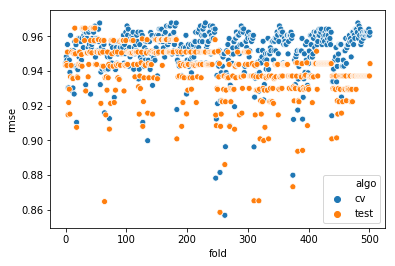

In [184]:
import seaborn as sns
cv_tupels = [[f,'cv',x] for f,x in zip(range(511),allresult4)]
test_tupels = [[f,'test',x] for f,x in zip(range(511),allresult5)]
results = pd.DataFrame(cv_tupels+test_tupels,columns=['fold','algo','rmse'])
sns.scatterplot(data=results,x='fold',y='rmse',hue='algo')

Answer:
1.Which subset looks best given the cross-validation scores?

    A:  The subset of 'thickness size shape adhesion nuclei chromatin nucleoli' is the best in train data with a score of 0.9677865117338801

2. What is the accuracy of this subset on the test data?
    A:  The accuracy of this subset on test data is 0.9647619047619047
    
3. Is that the best possible test data accuracy?
    A:  No, the best data accuracy for test data is not the best one in train data, is another setsub of 'thickness shape single' which has the accuracy of 0.9647

Part 3

In [177]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

sgd1 = SGDClassifier(random_state=1337316)
a = breastData.iloc[:,1:10]
b = breastData.iloc[:,10]
sgd_scores=cross_val_predict(sgd1,a,b,cv=10,method="decision_function")
print(sgd_scores)


fpr,tpr,thresholds = roc_curve(y, sgd_scores)
fpr,tpr,thresholds



[-120.95527326  565.20080309 -135.4515284   632.84999371  -84.71463543
 1490.54508915  120.64897897 -174.10820875 -162.02799614 -152.36382605
 -227.26114424 -239.34135686  272.85965788 -149.94778353 1149.88309349
  362.25323121 -186.18842136 -147.53174101  946.93552162  -94.37880552
  915.52696883  985.59220197 -212.76488911  383.99761391 -227.26114424
  449.23076201 -178.9402938  -159.61195362 -239.34135686 -251.42156947
 -212.76488911 -200.6846765   898.61467117 -169.27612371 -186.18842136
 -239.34135686 1219.94832664   94.07251123  893.78258613  562.78476056
  833.38152307  514.46391012 1103.97828557  311.51633824 1125.72266827
 -236.92531433  850.29382072 -265.9178246   -84.71463543  879.28633099
  461.31097462  304.26821067  748.82003478 1002.50449963  835.79756559
  688.41897173  701.67288556   81.49914039  344.53002842  276.96246085
  245.59180448 -227.26114424  706.49914039  -22.26533838 -265.9178246
  443.46825236 -147.53174101  368.66130255  984.0087929  -195.85259145
 -106.4

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

(array([0.        , 0.        , 0.        , 0.00218341, 0.00218341,
        0.00436681, 0.00436681, 0.00655022, 0.00655022, 0.00873362,
        0.00873362, 0.01091703, 0.01091703, 0.01310044, 0.01310044,
        0.01528384, 0.01528384, 0.01746725, 0.01746725, 0.01965066,
        0.01965066, 0.02183406, 0.02183406, 0.02401747, 0.02401747,
        0.02620087, 0.02620087, 0.03056769, 0.03056769, 0.03275109,
        0.03275109, 0.0371179 , 0.0371179 , 0.04803493, 0.04803493,
        0.05021834, 0.05021834, 0.05240175, 0.05240175, 0.05458515,
        0.05458515, 0.06550218, 0.069869  , 0.069869  , 0.08296943,
        0.08296943, 0.08951965, 0.09388646, 0.10043668, 0.10043668,
        0.12008734, 0.12445415, 0.1441048 , 0.14847162, 0.15720524,
        0.16375546, 0.17030568, 0.17467249, 0.18122271, 0.20524017,
        0.20524017, 0.21179039, 0.21615721, 0.22052402, 0.22707424,
        0.25327511, 0.25982533, 0.2860262 , 0.29475983, 0.29912664,
        0.30349345, 0.31877729, 0.3231441 , 0.36

In [176]:


forest_clf = RandomForestClassifier(random_state=1337316)
randomForest_scores=cross_val_predict(forest_clf,a,b,cv=10,method="predict_proba")
print(randomForest_scores)

y_scores_forest = randomForest_scores[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y, y_scores_forest)
fpr_forest, tpr_forest, thresholds_forest









/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

[[1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 ...
 [0.1 0.9]
 [0.2 0.8]
 [0.1 0.9]]


(array([0.        , 0.00655022, 0.01310044, 0.01965066, 0.02401747,
        0.02620087, 0.02838428, 0.0371179 , 0.04803493, 0.07641921,
        0.10917031, 1.        ]),
 array([0.        , 0.57676349, 0.78423237, 0.87551867, 0.90871369,
        0.94190871, 0.95850622, 0.97510373, 0.98755187, 0.98755187,
        0.99585062, 1.        ]),
 array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))

This is the auc for sgd:
0.9880229755929624
----------------
This is the auc for Random_Forest:
0.9884216057547699
----------------
This is the auc for GaussianNB:
0.985585895740093


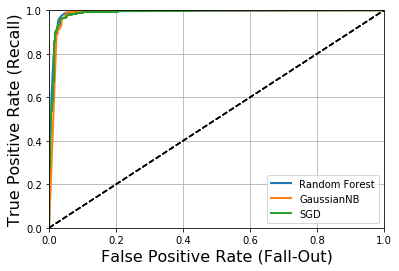

In [174]:
gnb = GaussianNB()
gnb_scores=cross_val_predict(gnb,a,b,cv=10,method="predict_proba")

y_scores_gnb = gnb_scores[:,1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y, y_scores_gnb)
fpr_gnb,tpr_gnb,thresholds_gnb

def plot_roc_curve(fpr_forest, tpr_forest, label=None):
    plt.plot(fpr_forest, tpr_forest, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16) 
    plt.grid(True)
    
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest" )
plot_roc_curve(fpr_gnb, tpr_gnb, "GaussianNB" )
plot_roc_curve(fpr,tpr,"SGD")
plt.legend(loc="lower right")



print("This is the auc for sgd:")
auc_sgd=roc_auc_score(y,sgd_scores)
print(auc_sgd)
print("----------------")
print("This is the auc for Random_Forest:")
auc_forest=roc_auc_score(y,y_scores_forest)
print(auc_forest)
print("----------------")
print("This is the auc for GaussianNB:")
auc_gnb=roc_auc_score(y,y_scores_gnb)
print(auc_gnb)


